<a href="https://colab.research.google.com/github/sunneysood/Tensorflow/blob/master/suny_sn1_gmail_com_Keras_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [5]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['train_' + string, 'val_'+string])
  plt.show()

In [7]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [10]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model with 2 Hidden Layers with Dropout, batchOptimization




In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [15]:
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))

model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.55))
#model_relu.add(BatchNormalization())

model_relu.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       


In [16]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 6s 95us/step - loss: 0.8717 - acc: 0.7282 - val_loss: 0.3533 - val_acc: 0.8981
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.4514 - acc: 0.8648 - val_loss: 0.2703 - val_acc: 0.9202
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3655 - acc: 0.8916 - val_loss: 0.2333 - val_acc: 0.9301
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3200 - acc: 0.9042 - val_loss: 0.2072 - val_acc: 0.9380
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2928 - acc: 0.9114 - val_loss: 0.1899 - val_acc: 0.9429
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2690 - acc: 0.9187 - val_loss: 0.1766 - val_acc: 0.9464
Epoch 7/20
60000/60000 [

Test score: 0.10519356010165065
Test accuracy: 0.9677


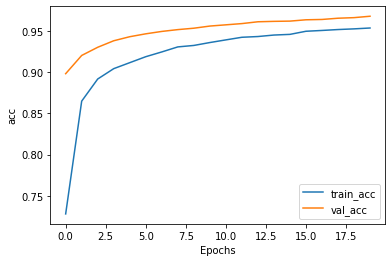

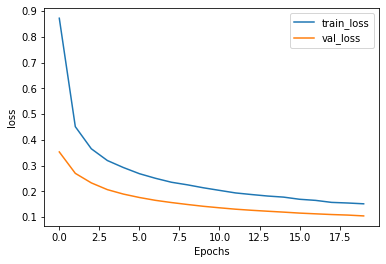

In [17]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

relu_sgd_2_layer_test_score= score[0]
relu_sgd_2_layer_test_accuracy= score[1]

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

#vy = history.history['val_loss']
#ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

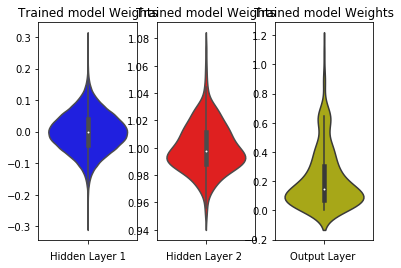

In [18]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model with 2 Hidden Layers using relu and adam optimizer with Dropout, batchOptimization




In [19]:
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))

model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.55))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [20]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3374 - acc: 0.8989 - val_loss: 0.1260 - val_acc: 0.9607
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1501 - acc: 0.9540 - val_loss: 0.0951 - val_acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1101 - acc: 0.9662 - val_loss: 0.0865 - val_acc: 0.9712
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0931 - acc: 0.9707 - val_loss: 0.0784 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0789 - acc: 0.9757 - val_loss: 0.0684 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0677 - acc: 0.9789 - val_loss: 0.0706 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0617 - acc: 0.9803 - val_loss: 0.0669 - val_ac

Test score: 0.063682770781804
Test accuracy: 0.982


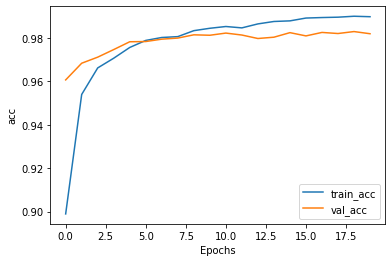

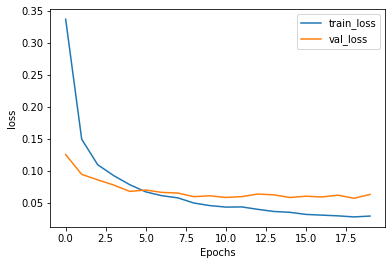

In [21]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

relu_adam_2_layer_test_score= score[0]
relu_adam_2_layer_test_accuracy= score[1]

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

#vy = history.history['val_loss']
#ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

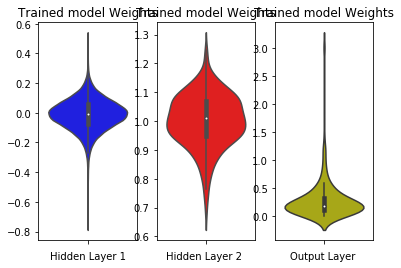

In [22]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model with 3 hidden Layers with Dropout, batchOptimization

In [23]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [24]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.7287 - acc: 0.7708 - val_loss: 0.2222 - val_acc: 0.9333
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3346 - acc: 0.9018 - val_loss: 0.1604 - val_acc: 0.9522
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2658 - acc: 0.9232 - val_loss: 0.1423 - val_acc: 0.9567
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2294 - acc: 0.9352 - val_loss: 0.1328 - val_acc: 0.9607
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2095 - acc: 0.9397 - val_loss: 0.1204 - val_acc: 0.9650
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1908 - acc: 0.9447 - val_loss: 0.1166 - val_acc: 0.9646
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1774 - acc: 0.9487 - val_loss: 0.1030 - val_acc

Test score: 0.0889917366705835
Test accuracy: 0.9714


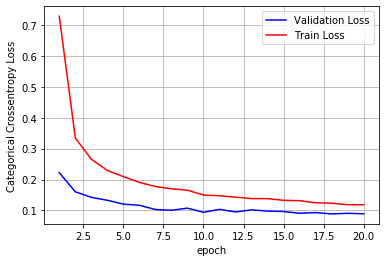

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

relu_adam_3_layer_test_score= score[0]
relu_adam_3_layer_test_accuracy= score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

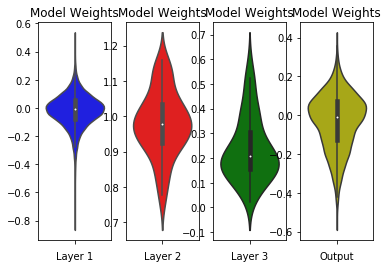

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 4, 2)
plt.title("Model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 4, 3)
plt.title("Model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Layer 3')

plt.subplot(1, 4, 4)
plt.title("Model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output')
plt.show()

# Model with 3 hidden Layers with sigmoid & adam optimizer using Dropout, batchOptimization

In [27]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='sigmoid') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='sigmoid') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [28]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.9959 - acc: 0.6775 - val_loss: 0.2848 - val_acc: 0.9177
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4181 - acc: 0.8786 - val_loss: 0.2184 - val_acc: 0.9360
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3307 - acc: 0.9061 - val_loss: 0.1814 - val_acc: 0.9467
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2876 - acc: 0.9172 - val_loss: 0.1572 - val_acc: 0.9525
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2577 - acc: 0.9265 - val_loss: 0.1468 - val_acc: 0.9566
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2365 - acc: 0.9326 - val_loss: 0.1370 - val_acc: 0.9596
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2200 - acc: 0.9357 - val_loss: 0.1270 - val_acc

Test score: 0.09181271484224125
Test accuracy: 0.9735


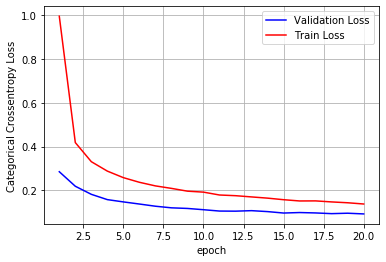

In [29]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

sigm_adam_3_layer_test_score= score[0]
sigm_adam_3_layer_test_accuracy= score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

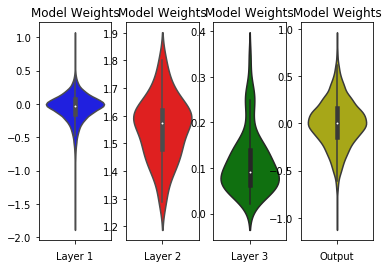

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 4, 2)
plt.title("Model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 4, 3)
plt.title("Model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Layer 3')

plt.subplot(1, 4, 4)
plt.title("Model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output')
plt.show()

# Model with 5 Hidden Layers with Dropout, batchOptimization

In [31]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='sigmoid') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='sigmoid') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='sigmoid') )
model_relu.add(Dense(512, activation='sigmoid') )
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [32]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.9550 - acc: 0.6772 - val_loss: 0.3434 - val_acc: 0.9042
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.4324 - acc: 0.8741 - val_loss: 0.2481 - val_acc: 0.9292
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.3441 - acc: 0.9035 - val_loss: 0.2030 - val_acc: 0.9436
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.3056 - acc: 0.9140 - val_loss: 0.1832 - val_acc: 0.9484
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2763 - acc: 0.9211 - val_loss: 0.1723 - val_acc: 0.9526
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2536 - acc: 0.9281 - val_loss: 0.1550 - val_acc: 0.9557
Epoch 7/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2423 - acc: 0.9319 - val_loss: 0.1476 - 

Test score: 0.10930517373122275
Test accuracy: 0.9689


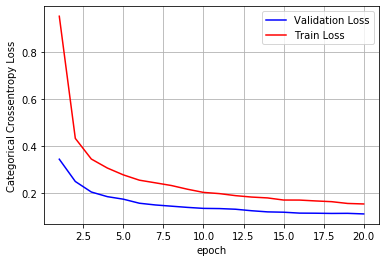

In [33]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

sigm_adam_5_layer_test_score= score[0]
sigm_adam_5_layer_test_accuracy= score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

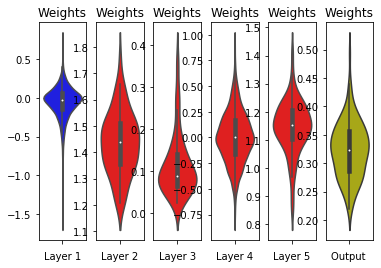

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Layer 3')


plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Layer 5')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output ')
plt.show()

# Model with 5 Hidden Layers using Sigmoid & SGD optimizer with Dropout, batchOptimization

In [35]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='sigmoid') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='sigmoid') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='sigmoid') )
model_relu.add(Dense(512, activation='sigmoid') )
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dense_23 (Dense)             (None, 128)              

In [36]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 140us/step - loss: 2.3064 - acc: 0.1084 - val_loss: 2.3014 - val_acc: 0.1032
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 2.3029 - acc: 0.1082 - val_loss: 2.2997 - val_acc: 0.1010
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.3018 - acc: 0.1106 - val_loss: 2.2985 - val_acc: 0.1118
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.3012 - acc: 0.1126 - val_loss: 2.2980 - val_acc: 0.1211
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 2.3002 - acc: 0.1134 - val_loss: 2.2929 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 2.2984 - acc: 0.1179 - val_loss: 2.2921 - val_acc: 0.0958
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 2.2970 - acc: 0.1202 - val_loss: 2.2892 - 

Test score: 1.5932028350830079
Test accuracy: 0.4043


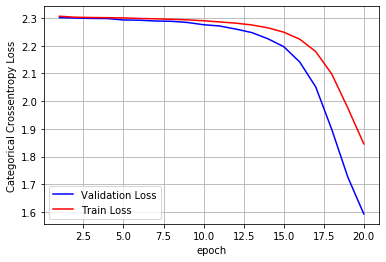

In [37]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

sigm_sgd_5_layer_test_score= score[0]
sigm_sgd_5_layer_test_accuracy= score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

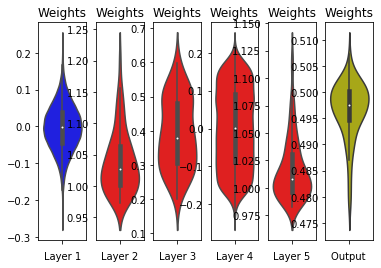

In [38]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Layer 3')


plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Layer 5')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output ')
plt.show()

# Model with 5 Hidden Layers using relu & SGD optimizer with Dropout, batchOptimization

In [39]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu') )
model_relu.add(Dropout(0.25))
model_relu.add(Dense(512, activation='relu') )
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dense_29 (Dense)             (None, 128)              

In [40]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 1.9435 - acc: 0.3198 - val_loss: 1.1463 - val_acc: 0.6863
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 1.1104 - acc: 0.6369 - val_loss: 0.5844 - val_acc: 0.8316
Epoch 3/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.7837 - acc: 0.7520 - val_loss: 0.4342 - val_acc: 0.8692
Epoch 4/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.6403 - acc: 0.8047 - val_loss: 0.3664 - val_acc: 0.8876
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5733 - acc: 0.8256 - val_loss: 0.3241 - val_acc: 0.9006
Epoch 6/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.5189 - acc: 0.8458 - val_loss: 0.2937 - val_acc: 0.9097
Epoch 7/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.4828 - acc: 0.8593 - val_loss: 0.2760 - 

Test score: 0.177155796212703
Test accuracy: 0.9478


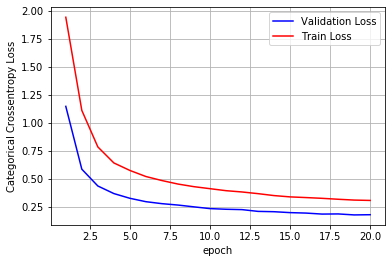

In [41]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

relu_sgd_5_layer_test_score= score[0]
relu_sgd_5_layer_test_accuracy= score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

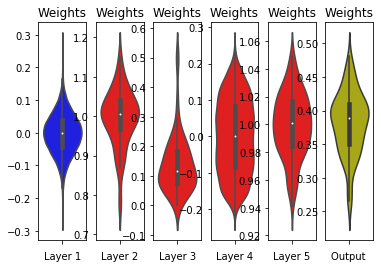

In [42]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Layer 3')


plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Layer 5')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output ')
plt.show()

# Model with 5 Hidden Layers using relu & adam optimizer with Dropout, batchOptimization

In [43]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu') )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu') )
model_relu.add(Dropout(0.25))
model_relu.add(Dense(512, activation='relu') )
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dense_35 (Dense)             (None, 128)              

In [44]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.6975 - acc: 0.7757 - val_loss: 0.2335 - val_acc: 0.9305
Epoch 2/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.3501 - acc: 0.8991 - val_loss: 0.1726 - val_acc: 0.9498
Epoch 3/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.2851 - acc: 0.9187 - val_loss: 0.1461 - val_acc: 0.9575
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2480 - acc: 0.9301 - val_loss: 0.1473 - val_acc: 0.9594
Epoch 5/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.2275 - acc: 0.9359 - val_loss: 0.1285 - val_acc: 0.9637
Epoch 6/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2131 - acc: 0.9399 - val_loss: 0.1217 - val_acc: 0.9666
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2025 - acc: 0.9447 - val_loss: 0.1216 -

Test score: 0.09845730073768645
Test accuracy: 0.973


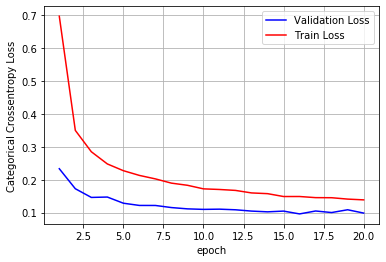

In [45]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

relu_adam_5_layer_test_score= score[0]
relu_adam_5_layer_test_accuracy= score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

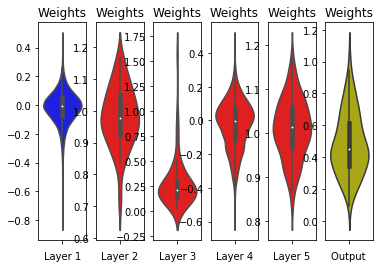

In [46]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Layer 3')


plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Layer 5')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output ')
plt.show()

# Conclusion

In [47]:
!pip3 install prettytable

In [48]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Optimizer", "Layer", "Test Score", "Test Accuracy"]

x.add_row(["Relu", "SGD", 2, relu_sgd_2_layer_test_score,relu_sgd_2_layer_test_accuracy])
x.add_row(["Relu", "Adam", 2, relu_adam_2_layer_test_score,relu_adam_2_layer_test_accuracy])
x.add_row(["Relu", "Adam", 3, relu_adam_3_layer_test_score,relu_adam_3_layer_test_accuracy])
x.add_row(["Sigmoid", "Adam", 3, sigm_adam_3_layer_test_score,sigm_adam_3_layer_test_accuracy])
x.add_row(["Relu", "Adam", 5, relu_adam_5_layer_test_score,relu_adam_5_layer_test_accuracy])
x.add_row(["Sigmoid", "Adam", 5, sigm_adam_5_layer_test_score,sigm_adam_5_layer_test_accuracy])
x.add_row(["Relu", "SGD", 5, relu_sgd_5_layer_test_score,relu_sgd_5_layer_test_accuracy])
x.add_row(["Sigmoid", "SGD", 5, sigm_sgd_5_layer_test_score,sigm_sgd_5_layer_test_accuracy])
print(x)

+---------+-----------+-------+---------------------+---------------+
|  Model  | Optimizer | Layer |      Test Score     | Test Accuracy |
+---------+-----------+-------+---------------------+---------------+
|   Relu  |    SGD    |   2   | 0.10519356010165065 |     0.9677    |
|   Relu  |    Adam   |   2   |  0.063682770781804  |     0.982     |
|   Relu  |    Adam   |   3   |  0.0889917366705835 |     0.9714    |
| Sigmoid |    Adam   |   3   | 0.09181271484224125 |     0.9735    |
|   Relu  |    Adam   |   5   | 0.09845730073768645 |     0.973     |
| Sigmoid |    Adam   |   5   | 0.10930517373122275 |     0.9689    |
|   Relu  |    SGD    |   5   |  0.177155796212703  |     0.9478    |
| Sigmoid |    SGD    |   5   |  1.5932028350830079 |     0.4043    |
+---------+-----------+-------+---------------------+---------------+
